In [1]:
import numpy as np 
import pandas as pd
import os
from numpy import random
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from PIL import Image

Using TensorFlow backend.


In [2]:
os.listdir()

['.ipynb_checkpoints',
 'papers',
 'readme.md',
 'Test',
 'test-multiple_fruits',
 'Training',
 'Untitled.ipynb']

In [3]:
TRAIN_DIR = "Training"
TEST_DIR = "Test"

#TRAIN_DIR = "fruits-360/Training"
#TEST_DIR = "fruits-360/Test"

In [4]:
# Labels
target_classes = os.listdir(TRAIN_DIR)
labels = list(enumerate(target_classes))

In [5]:

def random_images(DIR):
        
    target_classes = os.listdir(DIR)
    labels = list(enumerate(target_classes))
    qty_samples = 9
    index_fruit_classes = random.randint(len(target_classes), size=qty_samples)
    fruit_classes = np.take(target_classes, index_fruit_classes)
    fruits_indexes = [(fruit_class, os.path.join(TRAIN_DIR, fruit_class))
                      for fruit_class in fruit_classes]

    list_of_fruits = [(fruit[0], os.path.join(fruit[1],
                      np.random.choice(os.listdir(fruit[1])))) for fruit in
                      fruits_indexes]
    return(list_of_fruits)

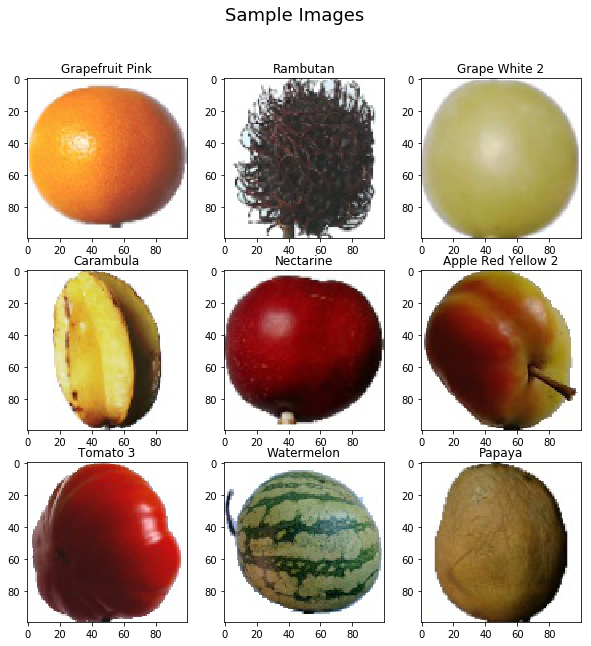

In [6]:
# Display Samples
list_of_fruits = random_images(TRAIN_DIR)

(fig, ax) = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Sample Images', fontsize=18)

for image_data in list_of_fruits:
    image_index = list_of_fruits.index(image_data)
    ax[image_index // 3][image_index
                         % 3].imshow(plt.imread(image_data[1]))
    ax[image_index // 3][image_index % 3].set_title(image_data[0])

https://www.kaggle.com/mbalazu/notebook7276500136

In [7]:
# Generate samples
IMAGE_SIZE = 100
image_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)

datagen = ImageDataGenerator(rescale=1. / 255,
                             zoom_range=0.1, horizontal_flip=True)

In [8]:
training_set = datagen.flow_from_directory(TRAIN_DIR,
        target_size=(IMAGE_SIZE,IMAGE_SIZE), batch_size=32,
        class_mode='categorical', color_mode='rgb', classes=os.listdir(TRAIN_DIR))

training_samples = training_set.samples

Found 67692 images belonging to 131 classes.


In [9]:
test_set = datagen.flow_from_directory(TEST_DIR,
        target_size=(IMAGE_SIZE,IMAGE_SIZE), batch_size=32,
        class_mode='categorical', color_mode='rgb', classes=os.listdir(TRAIN_DIR))

test_samples = test_set.samples

Found 7479 images belonging to 131 classes.


In [10]:
model = Sequential()
model.add(tf.keras.layers.Convolution2D(16, (3,3), activation = 'relu', input_shape=image_shape))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Convolution2D(32, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Convolution2D(64, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(len(labels),activation = 'softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0

In [11]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001)
model.compile(optimizer = optimizer,
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])
#categorical_crossentropy

In [13]:
batch_size = 128
history = model.fit(training_set,
         steps_per_epoch = training_samples//batch_size,
         epochs = 4,
         workers=12,
         validation_data = test_set,
         validation_steps = test_samples//batch_size,
                    shuffle=True)

Epoch 1/4
528/528 [==============================] - 157s 298ms/step - loss: 0.1035 - accuracy: 0.9678 - val_loss: 0.2580 - val_accuracy: 0.9165
Epoch 2/4
528/528 [==============================] - 142s 268ms/step - loss: 0.0686 - accuracy: 0.9802 - val_loss: 0.3408 - val_accuracy: 0.8998
Epoch 3/4
528/528 [==============================] - 162s 307ms/step - loss: 0.0611 - accuracy: 0.9822 - val_loss: 0.3163 - val_accuracy: 0.9138
Epoch 4/4
528/528 [==============================] - 124s 235ms/step - loss: 0.0514 - accuracy: 0.9848 - val_loss: 0.1959 - val_accuracy: 0.9445


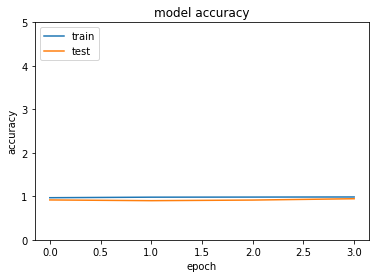

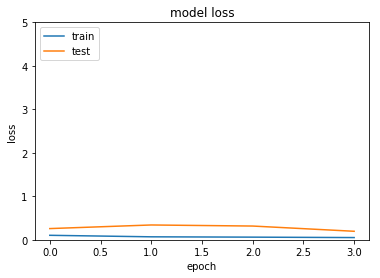

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 5])
plt.show()



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 5])
plt.show()

In [16]:
model_eval = model.evaluate_generator (
    test_set,
    verbose=0
)

print('Model accuracy:',model_eval[1])
print('Model loss:',model_eval[0])

Instructions for updating:
Please use Model.evaluate, which supports generators.
Model accuracy: 0.9400989413261414
Model loss: 0.21770279109477997


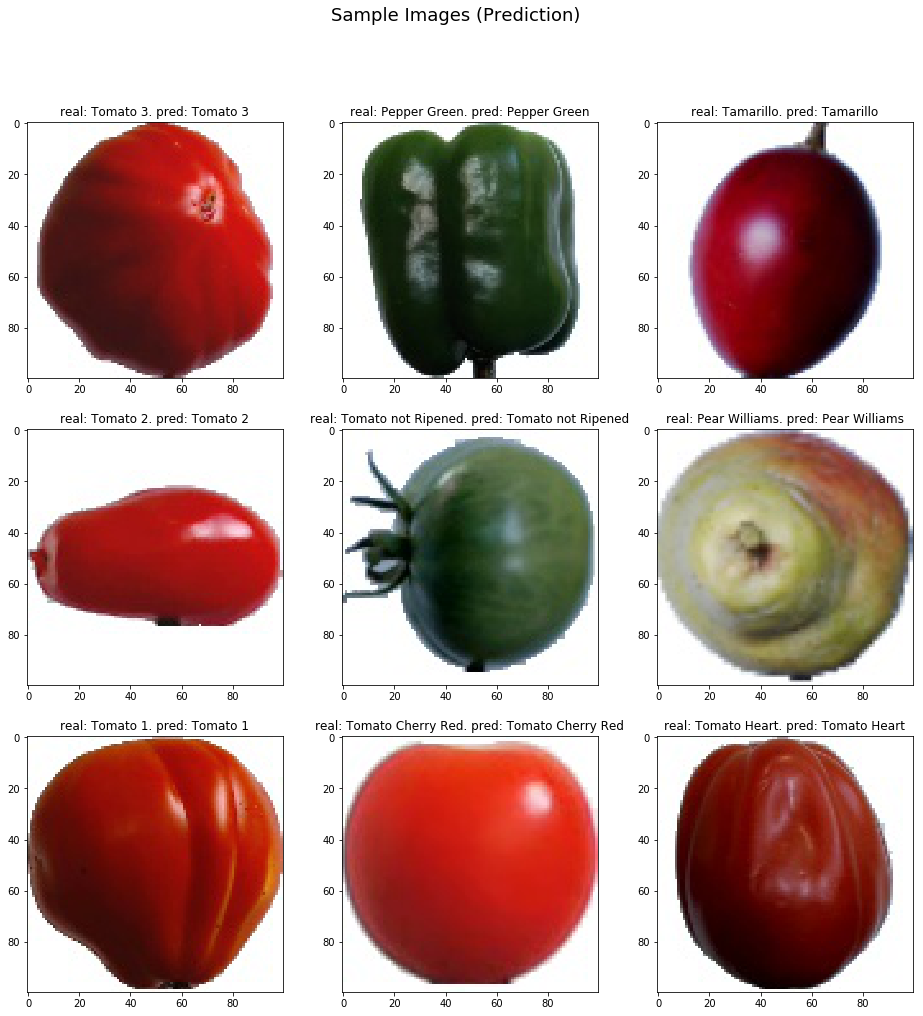

In [17]:
list_of_fruits = random_images(TEST_DIR)
(fig, ax) = plt.subplots(3, 3, figsize=(16, 16))
fig.suptitle('Sample Images (Prediction)', fontsize=18)

for image_data in list_of_fruits:
    image_index = list_of_fruits.index(image_data)
    ax[image_index // 3][image_index
                         % 3].imshow(plt.imread(image_data[1]))
    real = image_data[0]
    
    test_image = Image.open(image_data[1])
    test_image = test_image.convert('RGB')
    test_image = np.asarray(test_image) / 255
    arr_pred = model.predict(np.array([test_image]))
    pred = labels[arr_pred.argmax(axis=-1)[0]][1]
    ax[image_index // 3][image_index % 3].set_title(f"real: {real}. pred: {pred}")
    